In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.decomposition import TruncatedSVD
from scipy.spatial import distance

In [593]:
df = pd.read_csv('gvrd-rangestd.csv')
df.shape

(2206, 459)

# Perform data preprocessing.

In [594]:
# Calculate the proportion of 0 values in each row
row_zero_counts = (df == 0).sum(axis=1)
row_zero_percentages = (row_zero_counts / len(df.columns)) * 100

# Filter out rows to keep based on the proportion of 0 values
threshold = 100
df = df[row_zero_percentages <= threshold]

# Delate all the constant features, as I think features that are constant have no information about different observations.
constant_rows = df[df.nunique(axis=1) == 1]
df = df.drop(constant_rows.index)
# Matrix transpose
data = df.T
data.shape

(459, 1805)

# Q1

In [595]:
# First I want to find optimal k
k_values = range(1, 11)

# List to store the Within Cluster Sum of Squares for each k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    wcss.append(kmeans.inertia_)

/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

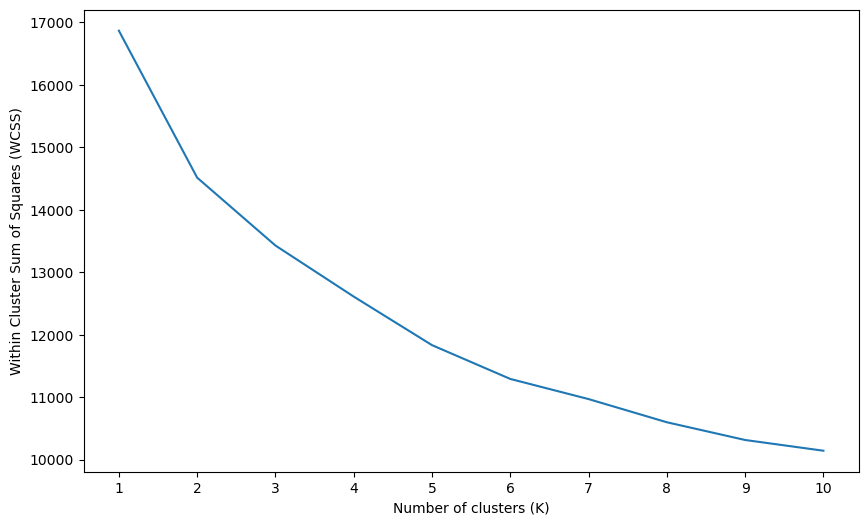

In [596]:
# Plot graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.show()

In [597]:
range_n_clusters = range(3, 11) 
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

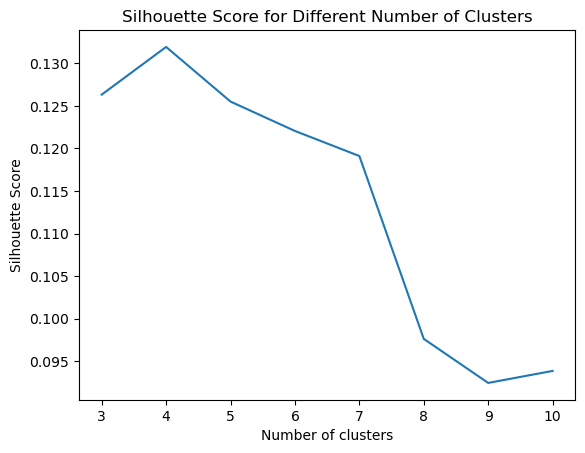

4

In [598]:
plt.plot(range_n_clusters, silhouette_scores)
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find optimal k
optimal_k = range_n_clusters[np.argmax(silhouette_scores)]
optimal_k

In [599]:
silhouette_scores

[0.12631708431459718,
 0.13192208925398785,
 0.12550135172398177,
 0.12204888708128911,
 0.11910681783191256,
 0.09762468258237023,
 0.09245160602869656,
 0.09386263889411162]

In [600]:
# Number of clusters
k = 4
# Perform k-means clustering on original data
kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
labels = kmeans.labels_


/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [601]:
n = data.shape[0]
# M using the original data
M = np.zeros((n, n))

In [602]:
for i in range(n):
    for j in range(n):
        if labels[i] == labels[j]:
            M[i, j] = 1 
        else:
            M[i, j] = 0

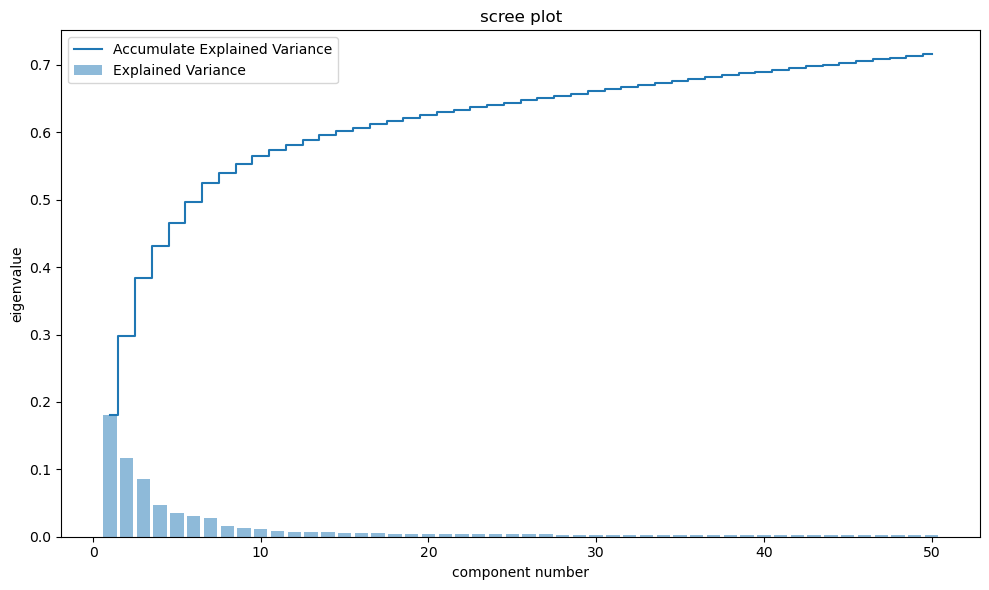

In [603]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(data)

# Get the first 50 PC
explained_variance_ratio_subset = pca.explained_variance_ratio_[:50]
cumulative_variance_subset = np.cumsum(explained_variance_ratio_subset)

# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, 51), explained_variance_ratio_subset, alpha=0.5, align='center', label='Explained Variance')
plt.step(range(1, 51), cumulative_variance_subset, where='mid', label='Accumulate Explained Variance')
plt.ylabel('eigenvalue')
plt.xlabel('component number')
plt.title('scree plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [604]:
# PCA using first 3 principal components
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data)

In [605]:
# k-means clustering on the reduced data
kmeans_reduced = KMeans(n_clusters=k, random_state=0).fit(data_reduced)
labels_reduced = kmeans_reduced.labels_

/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [606]:
# Calculating the silhouette score
silhouette_reduced = silhouette_score(data, labels_reduced)
print("The silhouette score for the clustering: ", silhouette_reduced)

The silhouette score for the clustering:  0.12089955119542112


In [607]:
# P using the reduced data
P = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if labels_reduced[i] == labels_reduced[j]:
            P[i, j] = 1 
        else:
            P[i, j] = 0
# Compare M and P
same_entries = np.sum(M == P)
total_entries = n * n
percentage = same_entries / total_entries

same_entries, total_entries, percentage

(190129, 210681, 0.9024496751012194)

Using first 7 principal components to perform k-means

In [608]:
# PCA using first 7 principal components
pca_choose = PCA(n_components=7)
data_reduced_choose = pca_choose.fit_transform(data)
# k-means clustering on the reduced data
kmeans_reduced_choose = KMeans(n_clusters=k, random_state=0).fit(data_reduced_choose)
labels_reduced_choose = kmeans_reduced_choose.labels_
# Calculating the silhouette score
silhouette_reduced_choose = silhouette_score(data, labels_reduced_choose)
print("The silhouette score for the clustering: ", silhouette_reduced_choose)

/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for the clustering:  0.13168680206655306


/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

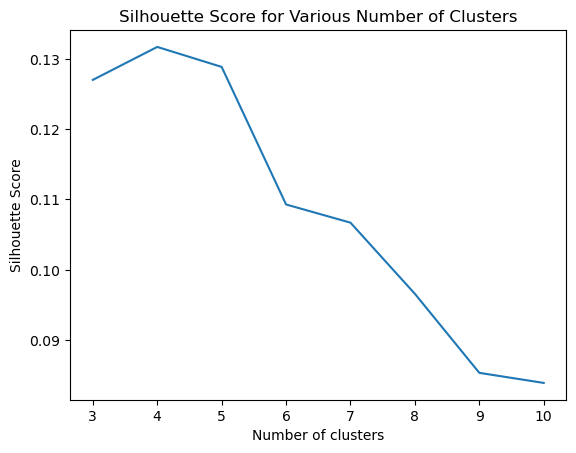

4

In [609]:
range_n_clusters = range(3, 11) 
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(data_reduced_choose)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_scores)
plt.title('Silhouette Score for Various Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find optimal k
optimal_k = range_n_clusters[np.argmax(silhouette_scores)]
optimal_k

In [610]:
# P using the reduced data
P_choose = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if labels_reduced_choose[i] == labels_reduced_choose[j]:
            P_choose[i, j] = 1 
        else:
            P_choose[i, j] = 0

# Compare M and P
same_entries = np.sum(M == P_choose)
total_entries = n * n
percentage = same_entries / total_entries

same_entries, total_entries, percentage

(206675, 210681, 0.9809854709252377)

# Q2

In [611]:
# Generate matrices
M_1_to_10 = []
for i in range(10):
    kmeans_loop = KMeans(n_clusters=k, random_state=random.randint(1, 10000)).fit(data)
    M_loop = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if kmeans_loop.labels_[i] == kmeans_loop.labels_[j]:
                M_loop[i, j] = 1
            else:
                M_loop[i, j] = 0
    M_1_to_10.append(M_loop)

/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

In [612]:
# Compare M1 to M10 with the inital M, calculate the percentage of the same values.
matching_percentage = []
for M_loop in M_1_to_10:
    count = 0
    count += np.sum(M_loop == M)
    matching_percentage_loop = count / (n * n) * 100
    matching_percentage.append(matching_percentage_loop)
print(matching_percentage)

[96.9119189675386, 97.35714184003304, 98.03494382502457, 97.56978560003037, 98.59693090501754, 97.63908468252951, 98.09854709252377, 96.9119189675386, 97.56124187753048, 99.119996582511]


We observe that all ten different sets demonstrate over 95% similarity with the initial cluster centroids. Hence I think the the results of k-means on this dataset is robust to the initial cluster centroid values chosen.

In [613]:
# Count observations that were recorded to be in the same cluster in at least one run
rows, cols = M_1_to_10[0].shape
count_all = 0
for i in range(rows):
    for j in range(cols):
        if any(M_1_to_10[k][i, j] == 1 for k in range(len(M_1_to_10))):
            count_all += 1

# Count observations that were in the same cluster in all ten(given prerequisite: were recorded to be in the same cluster in at least one run)
count_same = 0
for i in range(rows):
    for j in range(cols):
        if all(M_1_to_10[k][i, j] == 1 for k in range(len(M_1_to_10))):
            count_same += 1
print(count_same)
print(count_all)
print("Percentage:", (count_same/count_all)*100)

54475
66565
Percentage: 81.8373018853752


In [614]:
# Generate matrices
P_1_to_10 = []
for i in range(10):
    kmeans_loop = KMeans(n_clusters=k, random_state=random.randint(1, 10000)).fit(data_reduced_choose)
    P_loop = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if kmeans_loop.labels_[i] == kmeans_loop.labels_[j]:
                P_loop[i, j] = 1
            else:
                P_loop[i, j] = 0
    P_1_to_10.append(P_loop)

# Compare P1 to P10 with the inital P, calculate the percentage of the same values.
matching_percentage = []
for P_loop in P_1_to_10:
    count = 0
    count += np.sum(P_loop == P_choose)
    matching_percentage_loop = count / (n * n) * 100
    matching_percentage.append(matching_percentage_loop)
print(matching_percentage)

/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [615]:
# Count observations that were recorded to be in the same cluster in at least one run
rows, cols = P_1_to_10[0].shape
count_all = 0
for i in range(rows):
    for j in range(cols):
        if any(P_1_to_10[k][i, j] == 1 for k in range(len(P_1_to_10))):
            count_all += 1

# Count observations that were in the same cluster in all ten(given prerequisite: were recorded to be in the same cluster in at least one run)
count_same = 0
for i in range(rows):
    for j in range(cols):
        if all(P_1_to_10[k][i, j] == 1 for k in range(len(P_1_to_10))):
            count_same += 1
print(count_same)
print(count_all)
print("Percentage:", (count_same/count_all)*100)

61949
61949
Percentage: 100.0


# Q3

In [616]:
# Perform single-linkage clustering on the reduced-dimensional data
single_linkage = AgglomerativeClustering(n_clusters=k, linkage='single')
labels_single_linkage = single_linkage.fit_predict(data_reduced)

In [617]:
# Calculating the silhouette score
silhouette_avg = silhouette_score(data, labels_single_linkage)
print("The silhouette score for the clustering: ", silhouette_avg)

The silhouette score for the clustering:  0.09911136728095


In [618]:
# Create the matrix S for the single-linkage clustering
S = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if labels_single_linkage[i] == labels_single_linkage[j]:
            S[i, j] = 1 
        else:
            S[i, j] = 0

In [619]:
# Compare S and P
same_entries = np.sum(S == P)
total_entries = n * n
percentage = same_entries / total_entries

same_entries, total_entries, percentage

(57937, 210681, 0.2749986947090625)

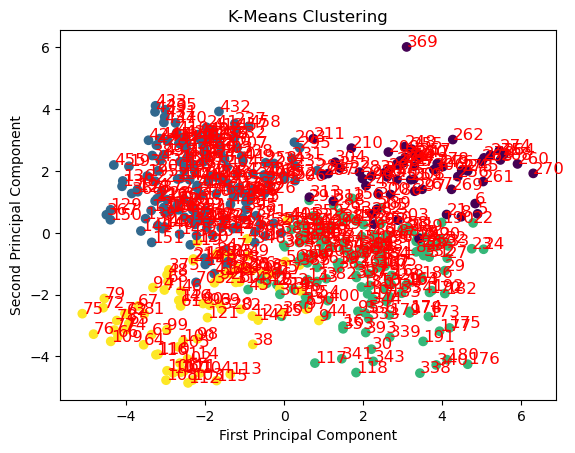

In [620]:
# First principal component
x = data_reduced[:, 0]
# Second principal component
y = data_reduced[:, 1]
# Scatter plot for k-means clustering
plt.scatter(x, y, c=labels)
plt.title('K-Means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
# Add labels for each point
for i, label in enumerate(labels_reduced_choose):
    plt.text(x[i], y[i], str(i), fontsize=12, color='red')  # Change fontsize and color as desired

plt.show()

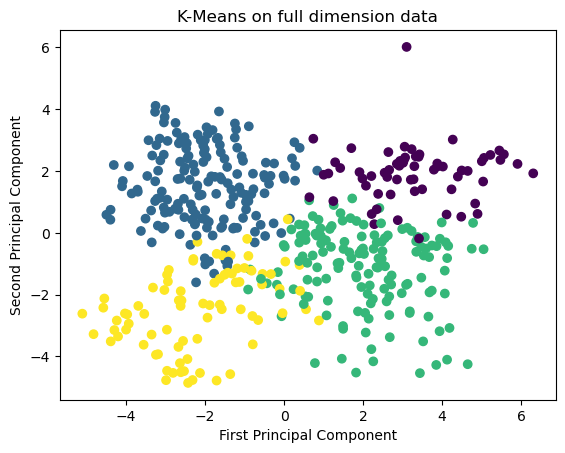

In [623]:
# Scatter plot for k-means clustering
plt.scatter(x, y, c=labels)
plt.title('K-Means on full dimension data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# # Add labels for specific points (97 and 369)
# for i, label in enumerate(labels_reduced_choose):
#     if i in [97, 369]:
#         plt.text(x[i], y[i], str(i), fontsize=12, color='red')  # Change fontsize and color as desired

plt.show()

Text(0, 0.5, 'Second Principal Component')

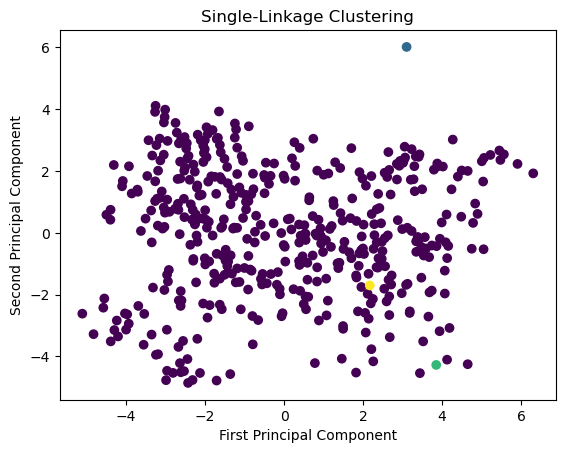

In [622]:
# Scatter plot for single-linkage clustering
plt.scatter(x, y, c=labels_single_linkage)
plt.title('Single-Linkage Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Chaining Effect: Single-linkage clustering is particularly sensitive to the chaining phenomenon, where clusters are formed by a series of closely spaced elements, even if these elements do not form a distinct group. This can lead to elongated, straggly clusters that do not accurately represent the underlying data structure.

Noise Sensitivity: It is highly sensitive to noise and outliers. A single noisy data point can cause two clusters to merge, which might otherwise be considered separate. This sensitivity can significantly distort the cluster structure.

In [267]:
# Perform Complete-linkage clustering on the reduced-dimensional data
complete_linkage = AgglomerativeClustering(n_clusters=k, linkage='complete')
labels_complete_linkage = complete_linkage.fit_predict(data_reduced)
# Calculating the silhouette score
silhouette_avg = silhouette_score(data, labels_complete_linkage)
print("The silhouette score for the clustering: ", silhouette_avg)

The silhouette score for the clustering:  0.1100512122924141


In [268]:
# Perform ward-linkage clustering on the reduced-dimensional data
ward_linkage = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_ward_linkage = ward_linkage.fit_predict(data_reduced)
# Calculating the silhouette score
silhouette_avg = silhouette_score(data, labels_ward_linkage)
print("The silhouette score for the clustering: ", silhouette_avg)

The silhouette score for the clustering:  0.10276068027024811


In [269]:
# Create the matrix C for the Complete-linkage clustering
C = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if labels_complete_linkage[i] == labels_complete_linkage[j]:
            C[i, j] = 1 
        else:
            C[i, j] = 0

In [270]:
# Compare C and P
same_entries = np.sum(C == P)
total_entries = n * n
percentage = same_entries / total_entries

same_entries, total_entries, percentage

(154025, 210681, 0.7310815878033615)

Text(0, 0.5, 'Second Principal Component')

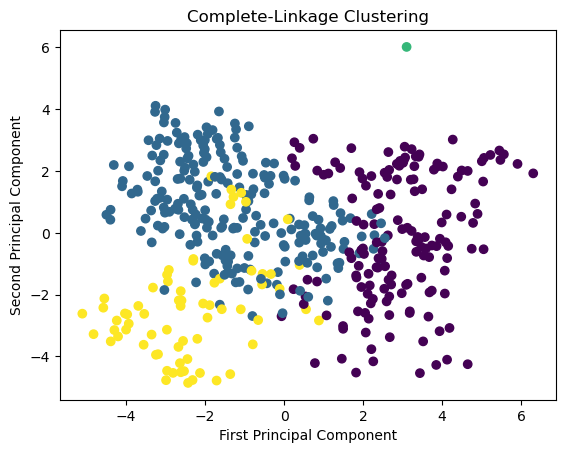

In [271]:
# Scatter plot for Complete-linkage clustering
plt.scatter(x, y, c=labels_complete_linkage)
plt.title('Complete-Linkage Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Reduced Chaining Effect: Complete-linkage clustering is less prone to the chaining effect, making it more capable of identifying clusters that are compact and well-separated. This results in more globular (spherical) clusters, which are often desirable in cluster analysis.

Better Handling of Noise and Outliers: By considering the farthest points in clusters for merging decisions, complete-linkage is more robust against noise and outliers compared to single-linkage clustering, which can be easily influenced by a single noisy data point.

Still sensitive to outliers

In [261]:
# Perform Average-linkage clustering on the reduced-dimensional data
average_linkage = AgglomerativeClustering(n_clusters=k, linkage='average')
labels_average_linkage = average_linkage.fit_predict(data_reduced)

In [262]:
# Calculating the silhouette score
silhouette_avg = silhouette_score(data, labels_average_linkage)
print("The silhouette score for the clustering: ", silhouette_avg)

The silhouette score for the clustering:  0.12114297740044984


In [263]:
# Create the matrix C for the Average-linkage clustering
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if labels_average_linkage[i] == labels_average_linkage[j]:
            A[i, j] = 1 
        else:
            A[i, j] = 0

In [264]:
# Compare A and P
same_entries = np.sum(A == P)
total_entries = n * n
percentage = same_entries / total_entries

same_entries, total_entries, percentage

(171039, 210681, 0.811838751477352)

Text(0, 0.5, 'Second Principal Component')

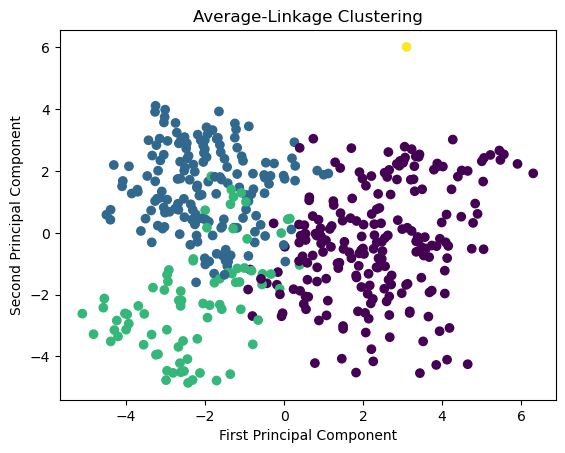

In [265]:
# Scatter plot for Average-linkage clustering
plt.scatter(x, y, c=labels_average_linkage)
plt.title('Average-Linkage Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Less Sensitive to Outliers: Average-linkage clustering is less sensitive to outliers compared to complete-linkage clustering, as it does not solely depend on the maximum distance between clusters.

More Balanced Clustering: It tends to form more natural clusters than complete-linkage, which can sometimes create overly compact clusters, ignoring reasonable similarities between data points.

# Q4

In [155]:
gmm = GaussianMixture(n_components=k, random_state=0)
gmm.fit(data_reduced)
probabilities = gmm.predict_proba(data_reduced)
labels_gmm = gmm.predict(data_reduced)

In [156]:
silhouette = silhouette_score(data, labels_gmm)
print('Silhouette Score:', silhouette)

Silhouette Score: 0.11403521513339474


In [157]:
n = data_reduced.shape[0]
E = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        sum_prob = 0
        for c in range(k):
            sum_prob += probabilities[i, c] * probabilities[j, c]
        E[i, j] = sum_prob

In [158]:
significant_p = probabilities > 0.01
num_significant = np.sum(significant_p, axis=1)
multiclusters = num_significant > 1
num_multiclusters = np.sum(multiclusters)
percentage = (num_multiclusters / n) * 100
percentage

73.42047930283225

Using 7 principle component

In [159]:
gmm_choose = GaussianMixture(n_components=k, random_state=0)
gmm_choose.fit(data_reduced_choose)
probabilities_choose = gmm_choose.predict_proba(data_reduced_choose)
labels_gmm_choose = gmm_choose.predict(data_reduced_choose)

silhouette = silhouette_score(data, labels_gmm_choose)
print('Silhouette Score:', silhouette)

Silhouette Score: 0.06694353986395209


Using full data

In [160]:
gmm_full = GaussianMixture(n_components=k, random_state=0)
gmm_full.fit(data)
probabilities_full = gmm_full.predict_proba(data)
labels_gmm_full = gmm_full.predict(data)

silhouette = silhouette_score(data, labels_gmm_full)
print('Silhouette Score:', silhouette)

Silhouette Score: 0.1293451336269544


# Q5

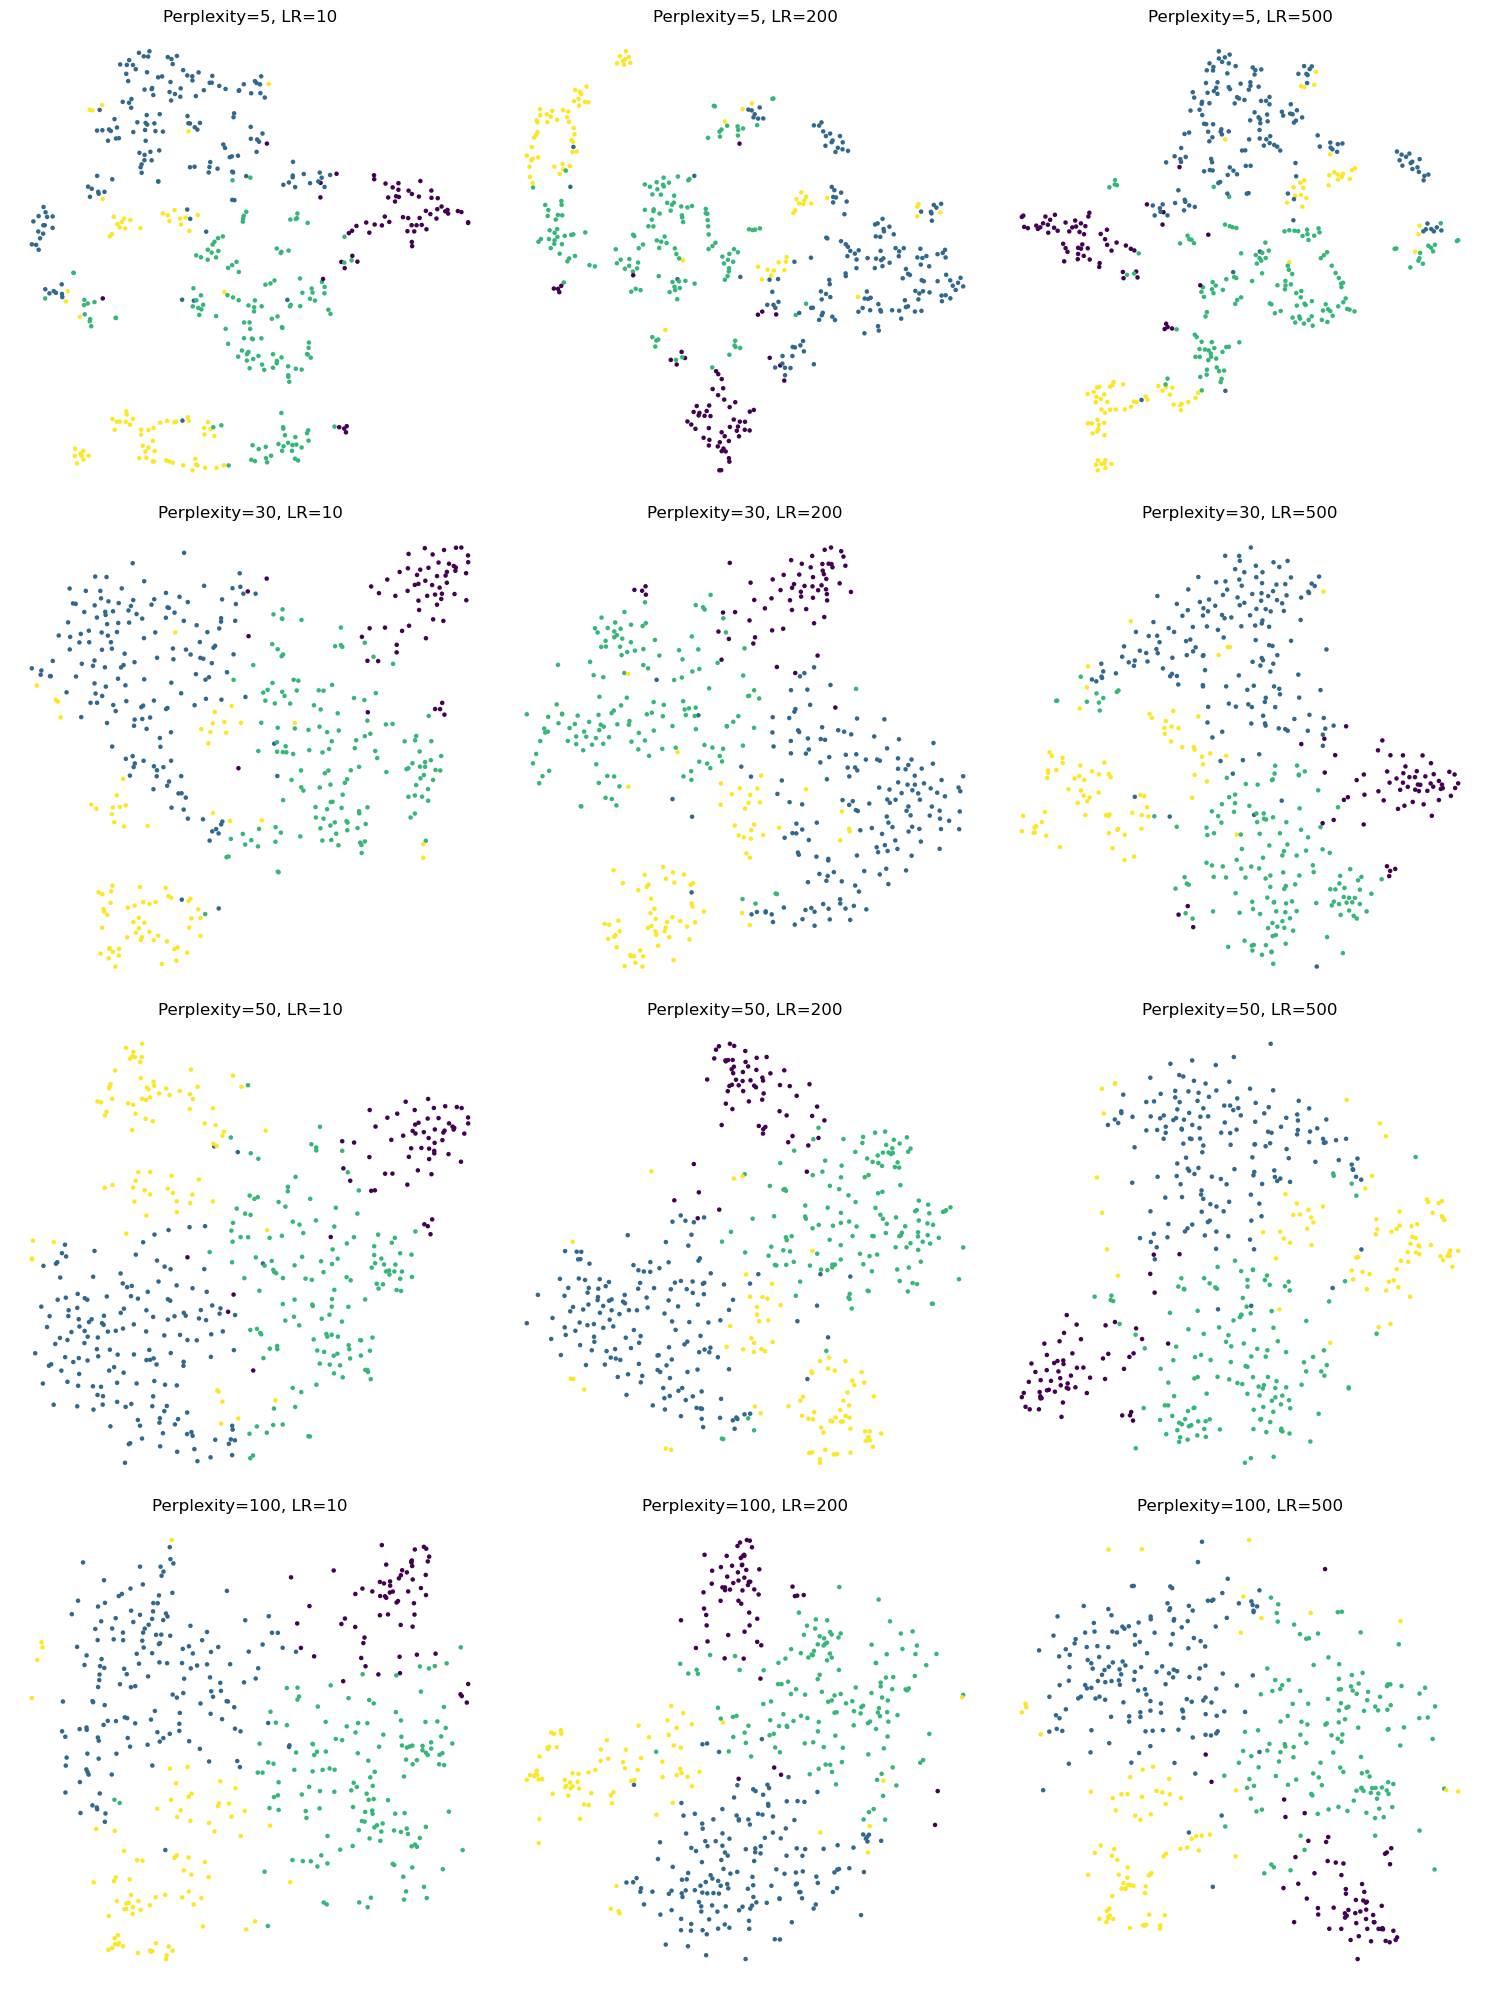

In [209]:
perplexities = [5, 30, 50, 100]
learning_rates = [10, 200, 500]

# Create matplotlib figures
fig, axes = plt.subplots(len(perplexities), len(learning_rates), figsize=(15, 20))

# Apply t-SNE for each perplexity and learning rate combination and plot
for i, perplexity in enumerate(perplexities):
    for j, learning_rate in enumerate(learning_rates):
        ax = axes[i, j]

        # Apply t-SNE
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=0)
        X_tsne = tsne.fit_transform(data)

        # Scatter plot with K-means labels to determine colors
        scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, s=5)
        ax.set_title(f'Perplexity={perplexity}, LR={learning_rate}')
        ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [210]:
# Add labels to the dataset
kmeans_labels = kmeans.fit_predict(data_reduced_choose)
data_kmeans = data.copy()
data_kmeans['kmeans_label'] = kmeans_labels

single_linkage_labels = single_linkage.fit_predict(data)
data_single_linkage = data.copy()
data_single_linkage['single_linkage_label'] = single_linkage_labels

gmm_labels = gmm.fit_predict(data_reduced)
data_gmm = data.copy()
data_gmm['gmm_label'] = gmm_labels

/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


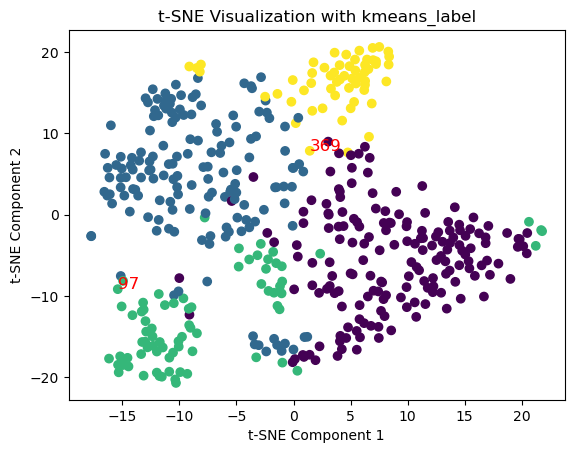

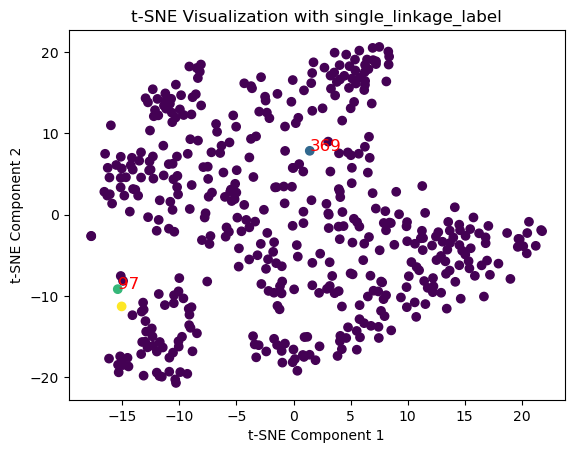

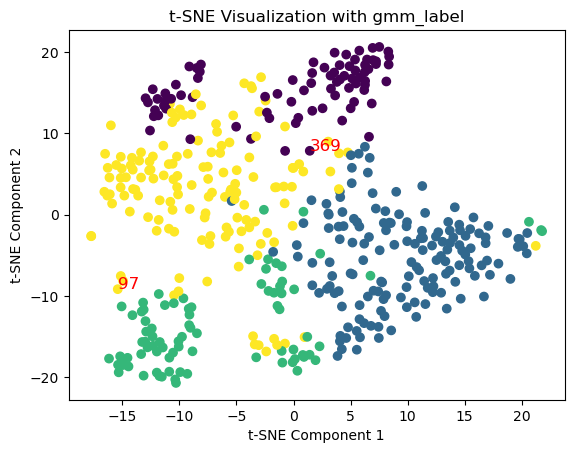

In [587]:
# Set tuning parameters
# Here we choose n_components=2 as in Q3 we plot the data in 2D hence here we also plot it in 2D
tsne = TSNE(n_components=2, random_state=1, perplexity=30,learning_rate=200)

# Print data points with labels
for data_labeled, label_column in [(data_kmeans, 'kmeans_label'), (data_single_linkage, 'single_linkage_label'), (data_gmm, 'gmm_label')]:
    tsne_results = tsne.fit_transform(data_labeled.drop(label_column, axis=1))
    x = tsne_results[:, 0]
    y = tsne_results[:, 1]
    plt.scatter(x, y, c=data_labeled[label_column])
    plt.title(f't-SNE Visualization with {label_column}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    # Add labels for specific points (97 and 369)
    for i, label in enumerate(data_labeled[label_column]):
        if i in [97, 369]:
            plt.text(x[i], y[i], str(i), fontsize=12, color='red')  # Change fontsize and color as desired

    plt.show()

Text(0, 0.5, 't-SNE Component 2')

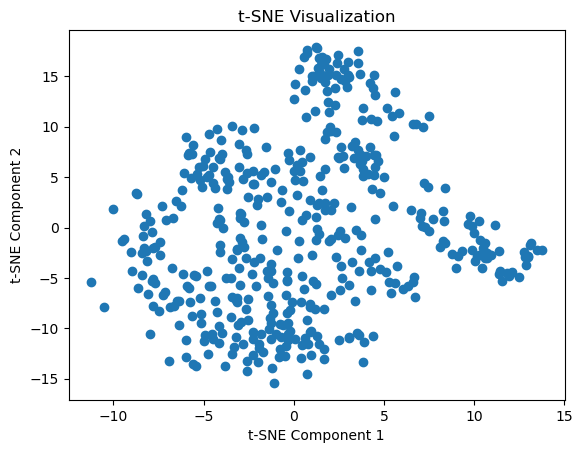

In [214]:
tsne_results = tsne.fit_transform(data_labeled.drop(label_column, axis=1))
x = tsne_results[:, 0]
y = tsne_results[:, 1]
plt.scatter(x, y)
plt.title(f't-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

In [194]:
data_array = data.to_numpy()

# Calculate the distance matrix between each data point and all other data points
dist_matrix = distance.cdist(data_array, data_array, 'euclidean')

# Initialize a list to store the nearest neighbor distances for each data point
nearest_distances = []

# Iterate through the data points to find the nearest neighbor distance for each point
for i in range(len(data_array)):
    distances_except_self = np.delete(dist_matrix[i], i) 
    nearest_neighbor_distance = np.min(distances_except_self)
    nearest_distances.append(nearest_neighbor_distance)

max_distance_index = np.argmax(nearest_distances)
second_max_distance_index = np.argsort(nearest_distances)[-2]
max_distance_value = nearest_distances[max_distance_index]
second_max_distance_value = nearest_distances[second_max_distance_index]
print(max_distance_index, max_distance_value, second_max_distance_index, second_max_distance_value)

369 28.020530763184787 97 9.23554334207298


In [208]:
print(np.argsort(nearest_distances)[-3], nearest_distances[np.argsort(nearest_distances)[-3]])
print(np.argsort(nearest_distances)[-4], nearest_distances[np.argsort(nearest_distances)[-4]])

98 7.897490356802093
305 7.811486710935174


# t-SNE k-means

In [582]:
# apply t-SNE（2D）
tsne_2d = TSNE(n_components=2, random_state=0, perplexity = 50)
X_tsne_2d = tsne_2d.fit_transform(data)

# apply t-SNE（3D）
tsne_3d = TSNE(n_components=3, random_state=0, perplexity = 30)
X_tsne_3d = tsne_3d.fit_transform(data)

/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

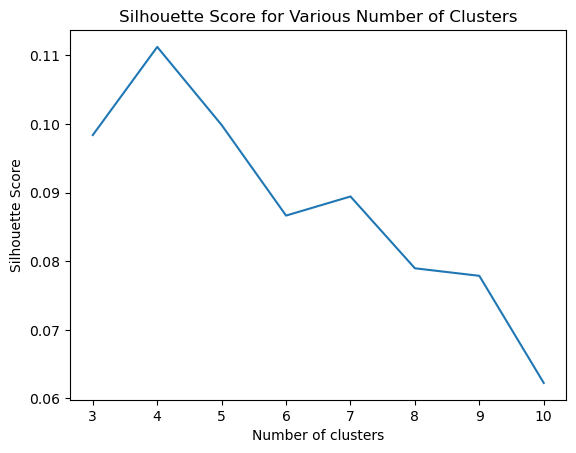

4

In [583]:
range_n_clusters = range(3, 11) 
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X_tsne_3d)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range_n_clusters, silhouette_scores)
plt.title('Silhouette Score for Various Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find optimal k
optimal_k = range_n_clusters[np.argmax(silhouette_scores)]
optimal_k

In [584]:
kmeans_2d = KMeans(n_clusters=k, random_state=0).fit(X_tsne_2d)
labels_2d = kmeans_2d.labels_
# Calculating the silhouette score
silhouette = silhouette_score(data, labels_2d)
print("The silhouette score for the clustering: ", silhouette)

The silhouette score for the clustering:  0.11354072444934839


/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [585]:
kmeans_3d = KMeans(n_clusters=k, random_state=0).fit(X_tsne_3d)
labels_3d = kmeans_3d.labels_
# Calculating the silhouette score
silhouette = silhouette_score(data, labels_3d)
print("The silhouette score for the clustering: ", silhouette)

The silhouette score for the clustering:  0.1112397173400513


/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [586]:
from mpl_toolkits.mplot3d import Axes3D  

Text(0, 0.5, 't-SNE Feature 2')

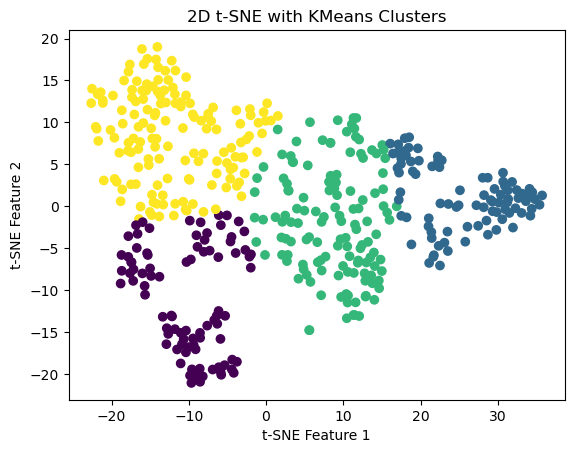

In [312]:
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=labels_2d)
plt.title('2D t-SNE with KMeans Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

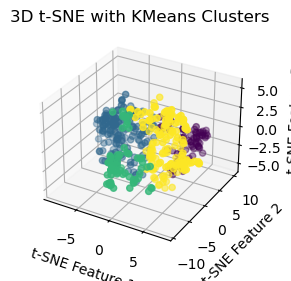

In [313]:
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=labels_3d)
ax.set_title('3D t-SNE with KMeans Clusters')
ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')

plt.show()

# autoencoder k-mean

In [578]:
# Dimension of the autoencoder
encoding_dim = 5

# Structure of the autoencoder
input_data = Input(shape=(data.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(data.shape[1], activation='sigmoid')(encoded)
# Autoencoder model
autoencoder = Model(input_data, decoded)
# Build the encoder model
encoder = Model(input_data, encoded)
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# Train the autoencoder
autoencoder.fit(data, data, epochs=400, batch_size=32, shuffle=True)
# Obtain a low-dimensional representation of the data
encoded_data = encoder.predict(data)

Epoch 1/400
15/15 [==============================] - 0s 686us/step - loss: 0.1541
Epoch 2/400
15/15 [==============================] - 0s 647us/step - loss: 0.0955
Epoch 3/400
15/15 [==============================] - 0s 593us/step - loss: 0.0398
Epoch 4/400
15/15 [==============================] - 0s 635us/step - loss: 0.0244
Epoch 5/400
15/15 [==============================] - 0s 648us/step - loss: 0.0218
Epoch 6/400
15/15 [==============================] - 0s 603us/step - loss: 0.0209
Epoch 7/400
15/15 [==============================] - 0s 667us/step - loss: 0.0201
Epoch 8/400
15/15 [==============================] - 0s 674us/step - loss: 0.0193
Epoch 9/400
15/15 [==============================] - 0s 666us/step - loss: 0.0187
Epoch 10/400
15/15 [==============================] - 0s 662us/step - loss: 0.0182
Epoch 11/400
15/15 [==============================] - 0s 685us/step - loss: 0.0178
Epoch 12/400
15/15 [==============================] - 0s 606us/step - loss: 0.0177
Epoch 13/400


In [579]:
# K-means clustering
kmeans_reduced_autoencoder = KMeans(n_clusters=4, random_state=0).fit(encoded_data)
labels_reduced_autoencoder = kmeans_reduced_autoencoder.labels_
# Calculating the silhouette score
silhouette_reduced = silhouette_score(data, labels_reduced_autoencoder)
print("The silhouette score for the clustering: ", silhouette_reduced)

The silhouette score for the clustering:  0.11241805047792551


/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


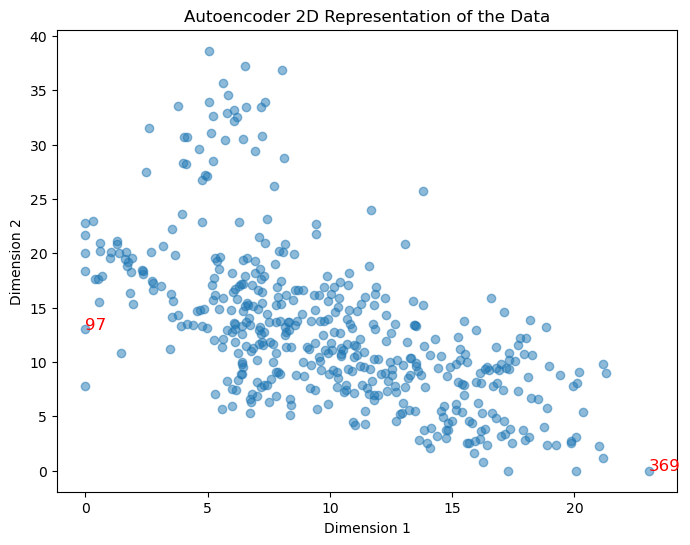

In [580]:
# getting first two dimentions
x = encoded_data[:, 0]
y = encoded_data[:, 1]

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Autoencoder 2D Representation of the Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# Add labels for specific points (97 and 369)
for i, label in enumerate(labels_reduced_choose):
    if i in [97, 369]:
        plt.text(x[i], y[i], str(i), fontsize=12, color='red')  # Change fontsize and color as desired

plt.show()

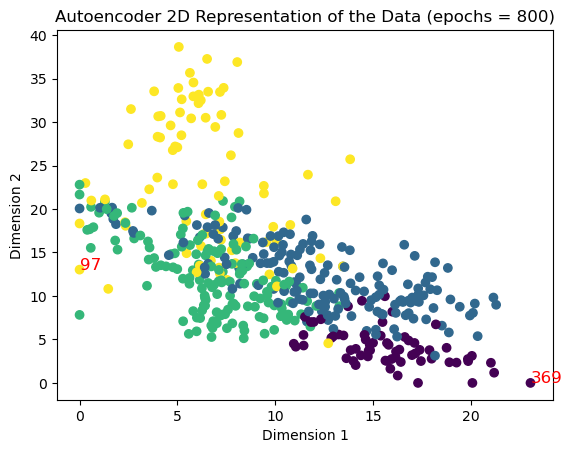

In [581]:
x = encoded_data[:, 0]
y = encoded_data[:, 1]

plt.scatter(x, y, c=labels)
plt.title('Autoencoder 2D Representation of the Data (epochs = 800)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# Add labels for specific points (97 and 369)
for i, label in enumerate(labels_reduced_choose):
    if i in [97, 369]:
        plt.text(x[i], y[i], str(i), fontsize=12, color='red')  # Change fontsize and color as desired

plt.show()

# SVD k-mean

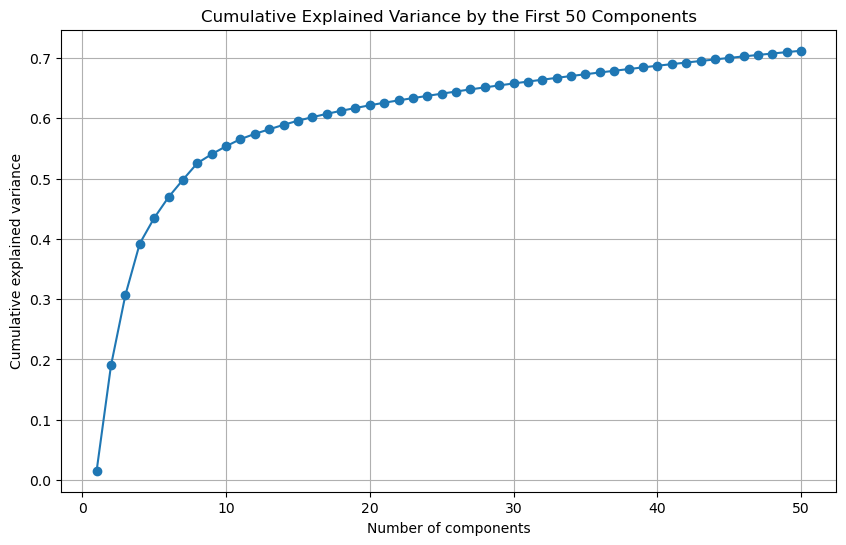

In [654]:
# see first 50 components
n_components = 50
svd = TruncatedSVD(n_components=n_components)
svd.fit(data)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(svd.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by the First 50 Components')
plt.grid(True)
plt.show()

In [655]:
# reduce data to selected dimensions
svd = TruncatedSVD(n_components=8)
data_reduced = svd.fit_transform(data)
# K-means clustering
kmeans_reduced_SVD = KMeans(n_clusters=4, random_state=5).fit(data_reduced)
labels_reduced_SVD = kmeans_reduced_SVD.labels_
# Calculating the silhouette score
silhouette_reduced = silhouette_score(data, labels_reduced_SVD)
print("The silhouette score for the clustering: ", silhouette_reduced)

The silhouette score for the clustering:  0.13168680206655306


/Users/yuanhaowen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


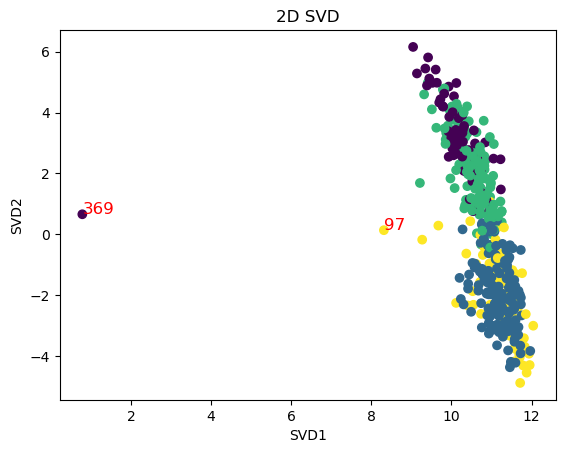

In [656]:
# reduce data to selected dimensions
svd = TruncatedSVD(n_components=2)
data_reduced = svd.fit_transform(data)
# reduce data to 2 dimensions for visualization
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels)
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.title('2D SVD')

# First principal component
x = data_reduced[:, 0]
# Second principal component
y = data_reduced[:, 1]
# for i, label in enumerate(labels):
#     plt.text(x[i], y[i], str(i), fontsize=12, color='red')  # Change fontsize and color as desired

# Add labels for specific points (97 and 369)
for i, label in enumerate(labels_reduced_choose):
    if i in [97, 369]:
        plt.text(x[i], y[i], str(i), fontsize=12, color='red')  # Change fontsize and color as desired

plt.show()
plt.show()

Text(0, 0.5, 't-SNE Feature 2')

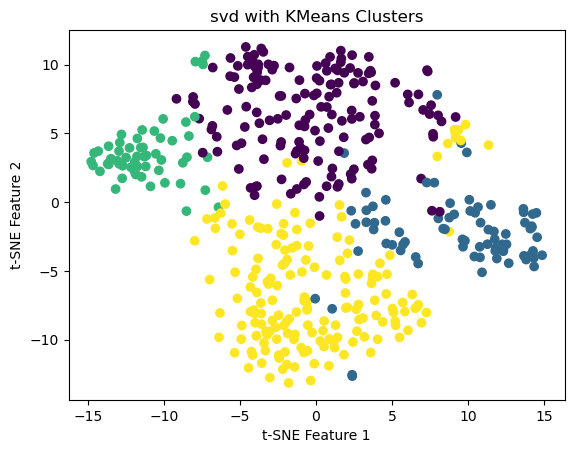

In [657]:
# svd-kmeans cluster in t-sne
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=labels_reduced_SVD)
plt.title('svd with KMeans Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')

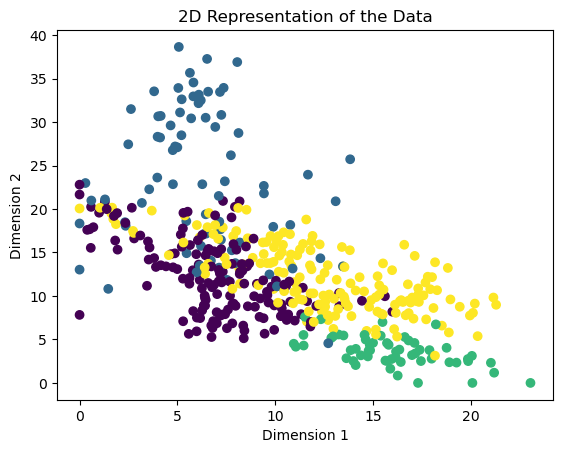

In [658]:
x = encoded_data[:, 0]
y = encoded_data[:, 1]

plt.scatter(x, y, c=labels_reduced_SVD)
plt.title('2D Representation of the Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

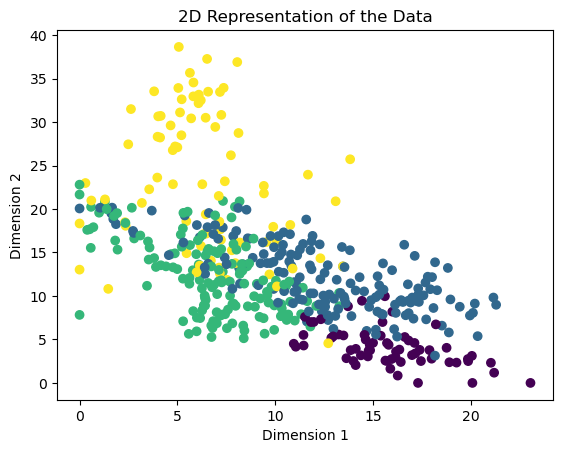

In [659]:
x = encoded_data[:, 0]
y = encoded_data[:, 1]

plt.scatter(x, y, c=labels)
plt.title('2D Representation of the Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

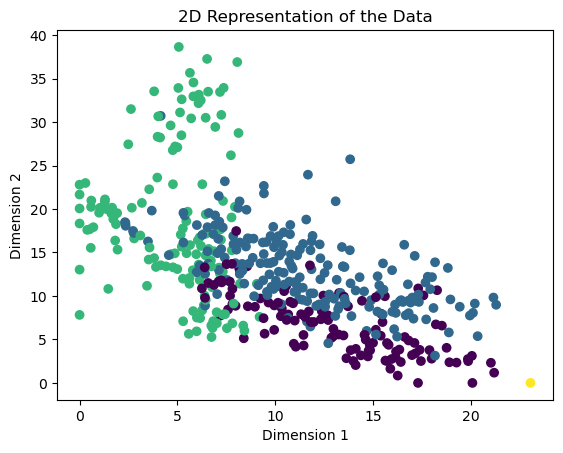

In [660]:
x = encoded_data[:, 0]
y = encoded_data[:, 1]

plt.scatter(x, y, c=labels_gmm_choose)
plt.title('2D Representation of the Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

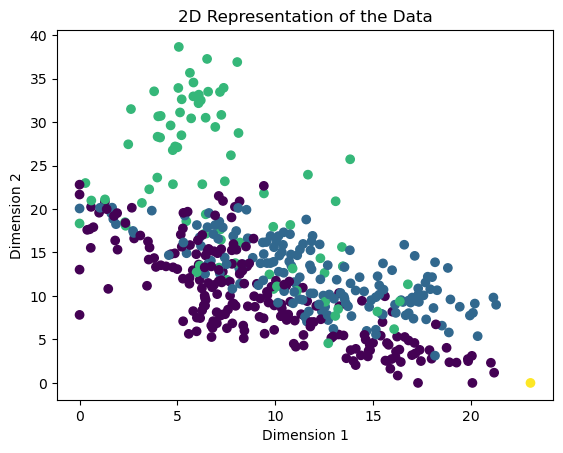

In [661]:
x = encoded_data[:, 0]
y = encoded_data[:, 1]

plt.scatter(x, y, c=labels_average_linkage)
plt.title('2D Representation of the Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

Text(0, 0.5, 'Second Principal Component')

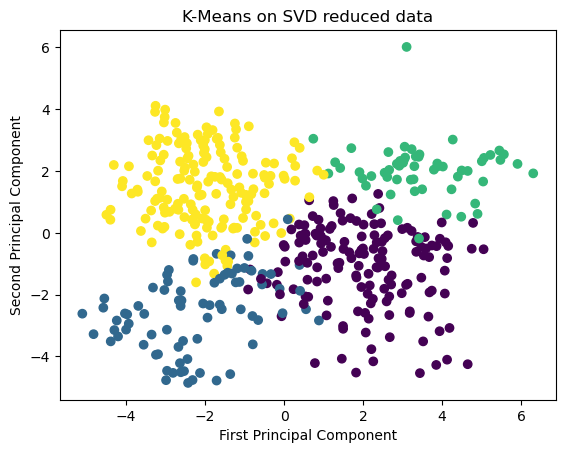

In [662]:
# PCA using first 2 principal components
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)
# First principal component
x = data_reduced[:, 0]
# Second principal component
y = data_reduced[:, 1]
# Scatter plot for k-means clustering
plt.scatter(x, y, c=labels_reduced_SVD)
plt.title('K-Means on SVD reduced data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

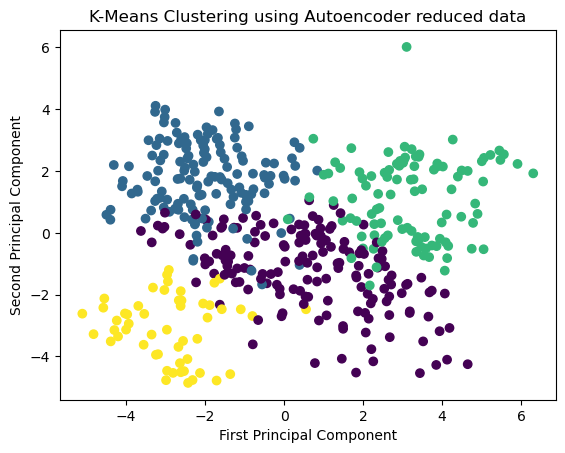

In [663]:
# Scatter plot for k-means clustering
plt.scatter(x, y, c=labels_reduced_autoencoder)
plt.title('K-Means Clustering using Autoencoder reduced data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')